# Facial Recognition Model Development
## Formative 2 - Model Creation

**Team Members:**
1. Erneste
2. Thierry
3. Rodas
4. Idara

---

## Objective:
Develop facial recognition models using engineered features from:
- `image_features.csv` (Image processing features)

## Models to Implement:
1. Random Forest
2. Logistic Regression
3. XGBoost

## Evaluation Metrics:
- Accuracy
- F1-Score
- Loss (where applicable)

---

## 1. Import Required Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, 
    confusion_matrix, roc_auc_score, log_loss
)

# Configure plotting
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style('whitegrid')

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Configuration & Data Loading

In [31]:
# Configuration
NOTEBOOK_DIR = Path.cwd()
ROOT_DIR = NOTEBOOK_DIR.parent

# Data paths
IMAGE_FEATURES_PATH = ROOT_DIR / "Image_Processing" / "image_features.csv"
    

print("Configuration:")
print(f"Notebook Directory: {NOTEBOOK_DIR}")
print(f"Image Features Path: {IMAGE_FEATURES_PATH}")

# Load datasets
print("\nLoading datasets...")

try:
    image_df = pd.read_csv(IMAGE_FEATURES_PATH)
    print(f" Image features loaded: {image_df.shape}")
except FileNotFoundError:
    print(" Image features file not found")
    image_df = None

Configuration:
Notebook Directory: c:\Users\LENOVO\Desktop\Formative-2__Data-Preprocessing\model_notebook
Image Features Path: c:\Users\LENOVO\Desktop\Formative-2__Data-Preprocessing\Image_Processing\image_features.csv

Loading datasets...
 Image features loaded: (192, 45)


## 3. Exploratory Data Analysis - Image Features

In [32]:
if image_df is not None:
    print("=" * 60)
    print("EXPLORATORY DATA ANALYSIS - IMAGE FEATURES")
    print("=" * 60)
    
    # Basic information
    print("\n1. DATASET OVERVIEW")
    print(f"Shape: {image_df.shape}")
    print(f"Columns: {len(image_df.columns)}")
    
    # Data types and missing values
    print("\n2. DATA TYPES AND MISSING VALUES:")
    print(image_df.info())
    
    # Summary statistics
    print("\n3. SUMMARY STATISTICS:")
    print(image_df.describe())
    
    # Check for missing values
    print("\n4. MISSING VALUES:")
    missing_values = image_df.isnull().sum()
    print(missing_values[missing_values > 0])
    
    # Target variable distribution
    print("\n5. TARGET VARIABLE DISTRIBUTION:")
    print("Member Distribution:")
    print(image_df['member'].value_counts())
    print("\nExpression Distribution:")
    print(image_df['expression'].value_counts())
    print("\nAugmentation Distribution:")
    print(image_df['augmentation'].value_counts())

EXPLORATORY DATA ANALYSIS - IMAGE FEATURES

1. DATASET OVERVIEW
Shape: (192, 45)
Columns: 45

2. DATA TYPES AND MISSING VALUES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   member            192 non-null    object 
 1   expression        192 non-null    object 
 2   augmentation      192 non-null    object 
 3   timestamp         192 non-null    object 
 4   height            192 non-null    int64  
 5   width             192 non-null    int64  
 6   channels          192 non-null    int64  
 7   hist_R_0          192 non-null    float64
 8   hist_R_1          192 non-null    float64
 9   hist_R_2          192 non-null    float64
 10  hist_R_3          192 non-null    float64
 11  hist_R_4          192 non-null    float64
 12  hist_R_5          192 non-null    float64
 13  hist_R_6          192 non-null    float64
 14  hist_R_7  

## 4. Visualization 1: Distribution of Team Members

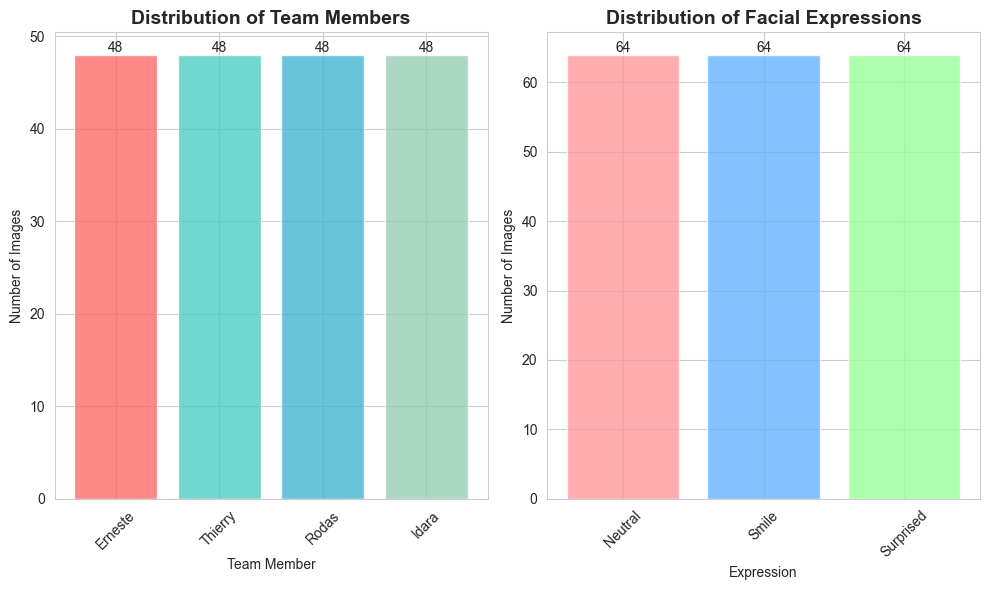

 Visualization 1: Team member and expression distributions created


In [33]:
if image_df is not None:
    plt.figure(figsize=(10, 6))
    
    # Plot 1: Team Member Distribution
    plt.subplot(1, 2, 1)
    member_counts = image_df['member'].value_counts()
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
    bars = plt.bar(member_counts.index, member_counts.values, color=colors, alpha=0.8)
    plt.title('Distribution of Team Members', fontsize=14, fontweight='bold')
    plt.xlabel('Team Member')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom')
    
    # Plot 2: Expression Distribution
    plt.subplot(1, 2, 2)
    expression_counts = image_df['expression'].value_counts()
    colors_exp = ['#FF9999', '#66B2FF', '#99FF99']
    bars_exp = plt.bar(expression_counts.index, expression_counts.values, color=colors_exp, alpha=0.8)
    plt.title('Distribution of Facial Expressions', fontsize=14, fontweight='bold')
    plt.xlabel('Expression')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    
    # Add value labels on bars
    for bar in bars_exp:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    print(" Visualization 1: Team member and expression distributions created")

## 5. Visualization 2: Feature Distributions and Outliers

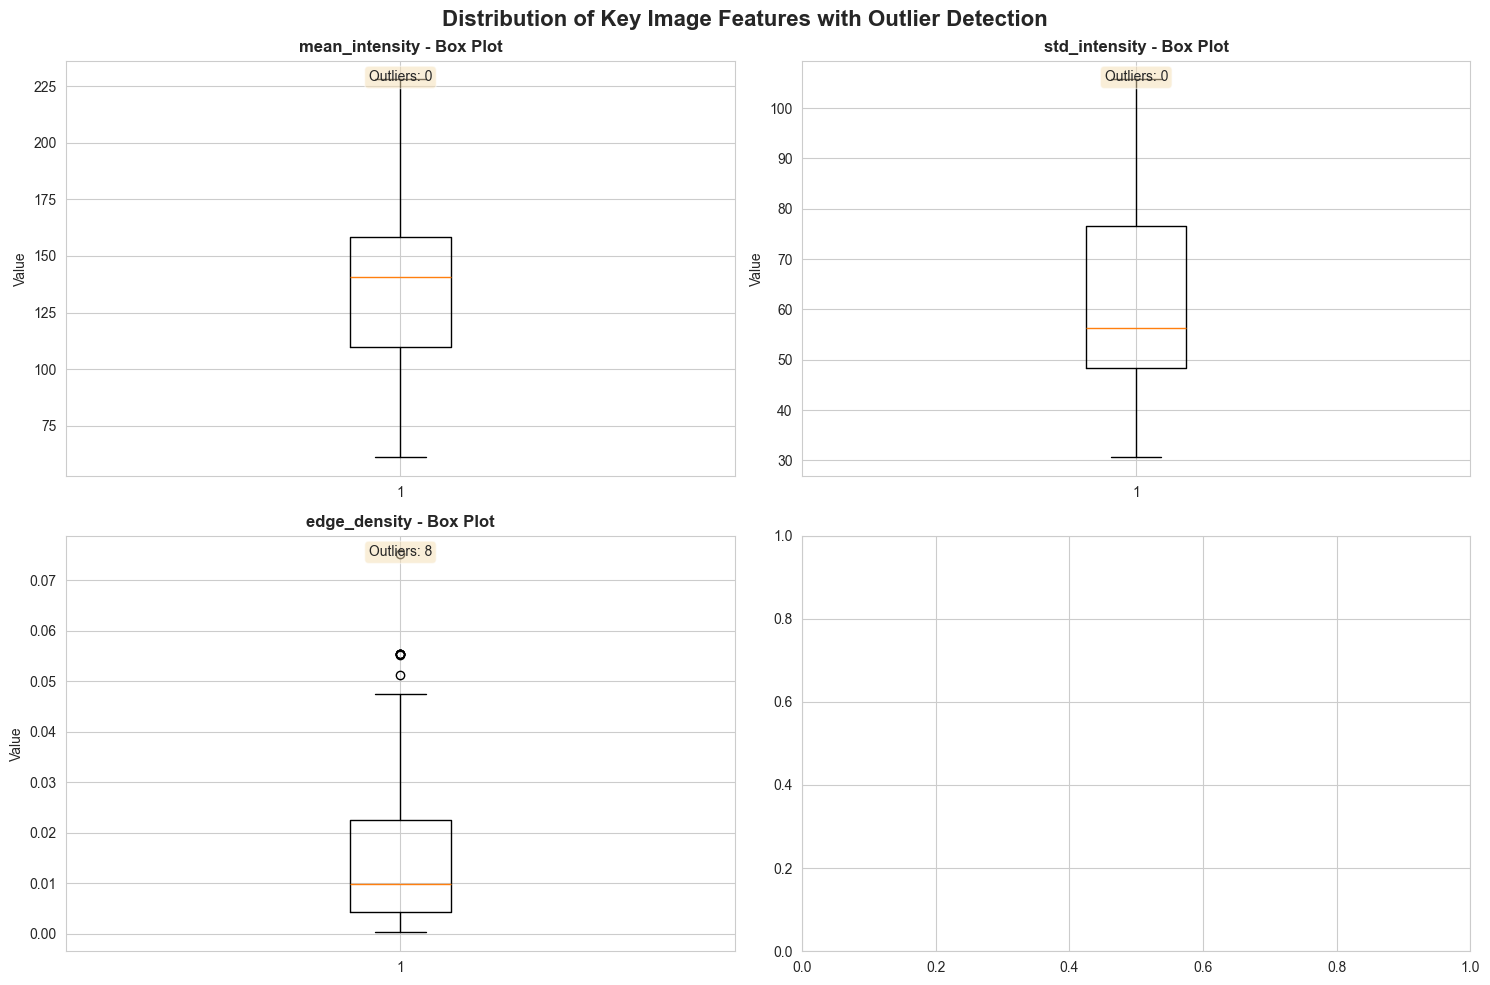

 Visualization 2: Feature distributions and outlier detection created


In [34]:
if image_df is not None:
    # Select key numerical features for visualization
    numerical_features = ['mean_intensity', 'std_intensity', 'edge_density', 'spectral_rolloff_mean']
    
    # Check which features exist in the dataset
    available_features = [f for f in numerical_features if f in image_df.columns]
    
    if available_features:
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('Distribution of Key Image Features with Outlier Detection', 
                    fontsize=16, fontweight='bold')
        
        for i, feature in enumerate(available_features[:4]):  # Show first 4 available features
            row = i // 2
            col = i % 2
            
            # Box plot for outliers
            axes[row, col].boxplot(image_df[feature].dropna())
            axes[row, col].set_title(f'{feature} - Box Plot', fontweight='bold')
            axes[row, col].set_ylabel('Value')
            
            # Calculate outliers
            Q1 = image_df[feature].quantile(0.25)
            Q3 = image_df[feature].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = image_df[(image_df[feature] < lower_bound) | (image_df[feature] > upper_bound)]
            
            axes[row, col].text(0.5, 0.95, f'Outliers: {len(outliers)}', 
                              transform=axes[row, col].transAxes, ha='center', 
                              bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        plt.tight_layout()
        plt.show()
        
        print(" Visualization 2: Feature distributions and outlier detection created")
    else:
        print("No numerical features found for visualization")

## 6. Visualization 3: Correlation Heatmap

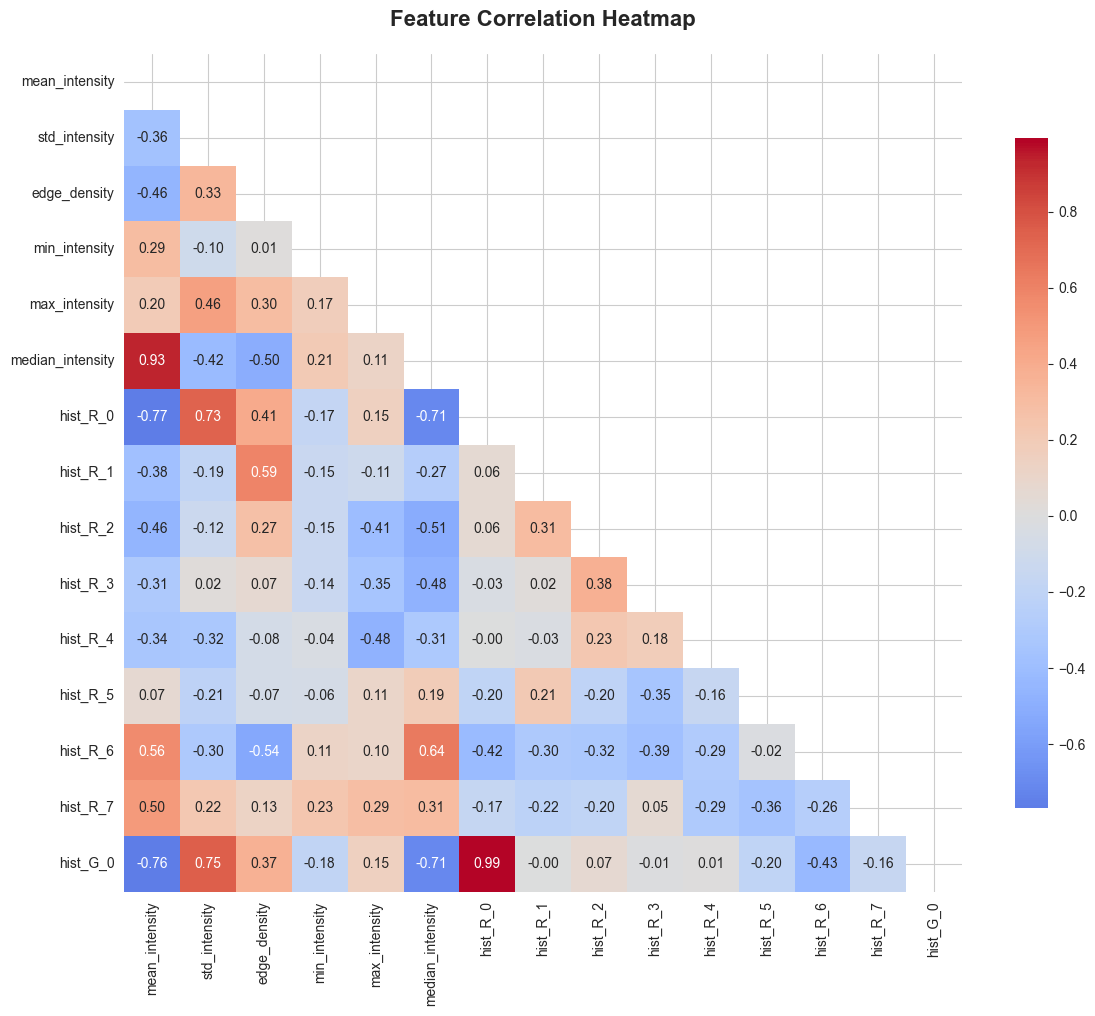

 Visualization 3: Correlation heatmap created

Top 10 Strongest Correlations:
hist_G_0          hist_R_0            0.994079
hist_R_0          hist_G_0            0.994079
median_intensity  mean_intensity      0.933928
mean_intensity    median_intensity    0.933928
                  hist_R_0           -0.767876
hist_R_0          mean_intensity     -0.767876
hist_G_0          mean_intensity     -0.761431
mean_intensity    hist_G_0           -0.761431
hist_G_0          std_intensity       0.750763
std_intensity     hist_G_0            0.750763
dtype: float64


In [35]:
if image_df is not None:
    # Select numerical columns for correlation
    numerical_cols = image_df.select_dtypes(include=[np.number]).columns
    
    # Take a subset if there are too many columns
    if len(numerical_cols) > 20:
        # Select the most important numerical features
        important_features = ['mean_intensity', 'std_intensity', 'edge_density', 
                            'min_intensity', 'max_intensity', 'median_intensity']
        # Add some histogram features
        hist_features = [col for col in numerical_cols if 'hist_' in col][:10]
        corr_features = important_features + hist_features
        corr_features = [f for f in corr_features if f in numerical_cols][:15]
    else:
        corr_features = numerical_cols
    
    if len(corr_features) > 1:
        plt.figure(figsize=(12, 10))
        
        # Calculate correlation matrix
        correlation_matrix = image_df[corr_features].corr()
        
        # Create heatmap
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
        sns.heatmap(correlation_matrix, 
                   mask=mask,
                   annot=True, 
                   fmt='.2f', 
                   cmap='coolwarm', 
                   center=0,
                   square=True,
                   cbar_kws={"shrink": .8})
        
        plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()
        
        print(" Visualization 3: Correlation heatmap created")
        
        # Print strongest correlations
        print("\nTop 10 Strongest Correlations:")
        corr_pairs = correlation_matrix.unstack().sort_values(key=abs, ascending=False)
        # Remove self-correlations and duplicates
        corr_pairs = corr_pairs[corr_pairs != 1.0]
        corr_pairs = corr_pairs[~corr_pairs.index.duplicated(keep='first')]
        print(corr_pairs.head(10))

## 7. Data Preprocessing for Model Training

In [36]:
def prepare_image_data(df, target_column='member'):
    """
    Prepare image data for model training
    """
    # Create a copy of the dataframe
    data = df.copy()
    
    # Remove non-feature columns
    columns_to_drop = ['timestamp', 'augmentation']
    if 'expression' != target_column:
        columns_to_drop.append('expression')
    if 'member' != target_column:
        columns_to_drop.append('member')
    
    # Only drop columns that exist
    columns_to_drop = [col for col in columns_to_drop if col in data.columns]
    data = data.drop(columns=columns_to_drop)
    
    # Handle missing values
    if data.isnull().sum().sum() > 0:
        print(f"Handling {data.isnull().sum().sum()} missing values...")
        # Fill numerical columns with median
        numerical_cols = data.select_dtypes(include=[np.number]).columns
        data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())
        
        # Fill categorical columns with mode
        categorical_cols = data.select_dtypes(include=['object']).columns
        for col in categorical_cols:
            if col != target_column:
                data[col] = data[col].fillna(data[col].mode()[0])
    
    # Separate features and target
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Encode categorical features
    categorical_features = X.select_dtypes(include=['object']).columns
    if len(categorical_features) > 0:
        print(f"Encoding {len(categorical_features)} categorical features...")
        X = pd.get_dummies(X, columns=categorical_features, drop_first=True)
    
    # Encode target variable
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    
    return X, y_encoded, le.classes_

if image_df is not None:
    print("Preparing image data for model training...")
    X_image, y_image, class_names = prepare_image_data(image_df, target_column='member')
    
    print(f"Features shape: {X_image.shape}")
    print(f"Target shape: {y_image.shape}")
    print(f"Classes: {class_names}")
    print(f"Number of features: {X_image.shape[1]}")

Preparing image data for model training...
Features shape: (192, 41)
Target shape: (192,)
Classes: ['Erneste' 'Idara' 'Rodas' 'Thierry']
Number of features: 41


## 8. Model Training and Evaluation

In [37]:
def train_and_evaluate_models(X, y, class_names, test_size=0.2, random_state=42):
    """
    Train and evaluate multiple models
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Define models
    models = {
        'Logistic Regression': LogisticRegression(random_state=random_state, max_iter=1000),
        'Random Forest': RandomForestClassifier(random_state=random_state, n_estimators=100),
        'XGBoost': XGBClassifier(random_state=random_state, eval_metric='logloss')
    }
    
    # Store results
    results = {}
    
    print("Training and evaluating models...")
    print("=" * 60)
    
    for name, model in models.items():
        print(f"\n{name}:")
        print("-" * 30)
        
        # Train model
        if name == 'Logistic Regression':
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            y_pred_proba = model.predict_proba(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        loss = log_loss(y_test, y_pred_proba)
        
        # Store results
        results[name] = {
            'accuracy': accuracy,
            'f1_score': f1,
            'log_loss': loss,
            'model': model,
            'predictions': y_pred,
            'true_values': y_test
        }
        
        print(f"Accuracy: {accuracy:.4f}")
        print(f"F1-Score: {f1:.4f}")
        print(f"Log Loss: {loss:.4f}")
        
        # Cross-validation
        if name == 'Logistic Regression':
            cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
        else:
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        
        print(f"Cross-validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    return results, X_test, y_test, scaler

if 'X_image' in locals() and 'y_image' in locals():
    results, X_test, y_test, scaler = train_and_evaluate_models(X_image, y_image, class_names)

Training and evaluating models...

Logistic Regression:
------------------------------
Accuracy: 1.0000
F1-Score: 1.0000
Log Loss: 0.0355
Cross-validation Accuracy: 0.9669 (+/- 0.0596)

Random Forest:
------------------------------
Accuracy: 1.0000
F1-Score: 1.0000
Log Loss: 0.0528
Cross-validation Accuracy: 0.9869 (+/- 0.0321)

XGBoost:
------------------------------
Accuracy: 1.0000
F1-Score: 1.0000
Log Loss: 0.0124
Cross-validation Accuracy: 0.9869 (+/- 0.0321)


## 9. Model Comparison Visualization

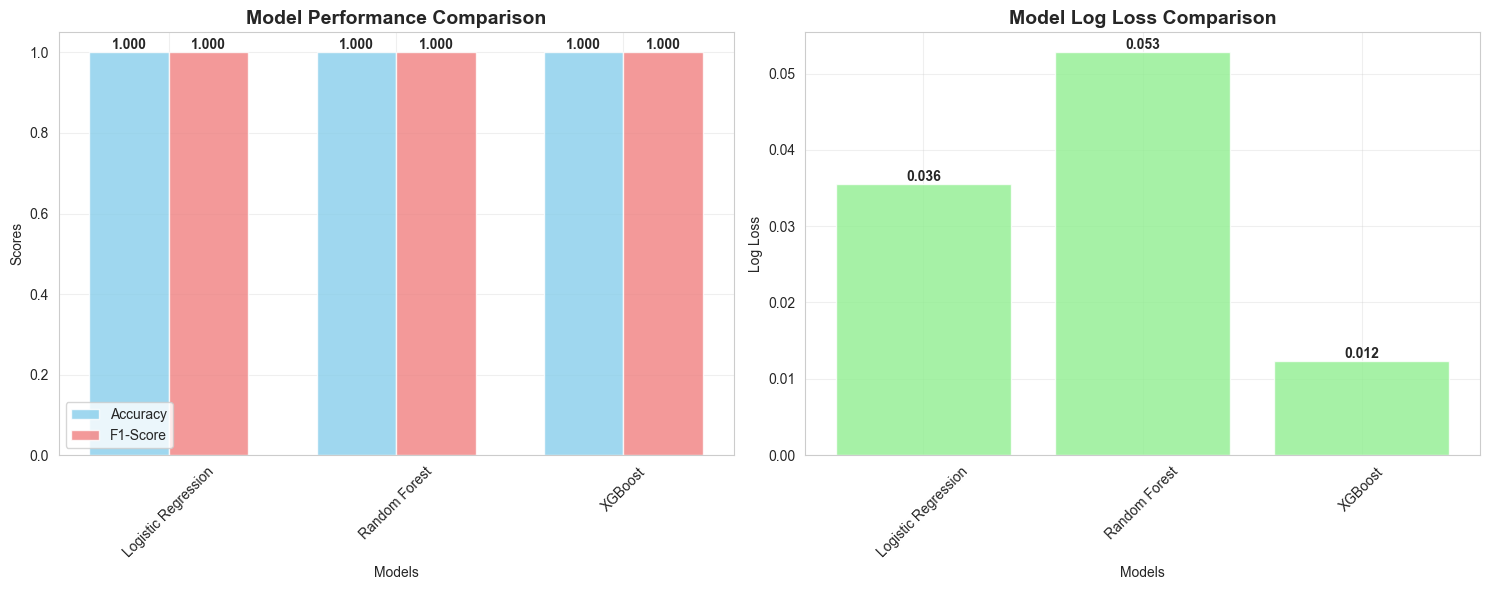

 Model comparison visualization created


In [38]:
if 'results' in locals():
    # Create comparison plot
    models = list(results.keys())
    accuracy_scores = [results[model]['accuracy'] for model in models]
    f1_scores = [results[model]['f1_score'] for model in models]
    
    x = np.arange(len(models))
    width = 0.35
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Accuracy and F1-Score comparison
    bars1 = ax1.bar(x - width/2, accuracy_scores, width, label='Accuracy', alpha=0.8, color='skyblue')
    bars2 = ax1.bar(x + width/2, f1_scores, width, label='F1-Score', alpha=0.8, color='lightcoral')
    
    ax1.set_xlabel('Models')
    ax1.set_ylabel('Scores')
    ax1.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels(models, rotation=45)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # Plot 2: Log Loss comparison
    loss_scores = [results[model]['log_loss'] for model in models]
    bars3 = ax2.bar(models, loss_scores, alpha=0.8, color='lightgreen')
    
    ax2.set_xlabel('Models')
    ax2.set_ylabel('Log Loss')
    ax2.set_title('Model Log Loss Comparison', fontsize=14, fontweight='bold')
    ax2.set_xticklabels(models, rotation=45)
    ax2.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar in bars3:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(" Model comparison visualization created")

## 10. Confusion Matrix for Best Model


Best Model: Logistic Regression
Best Accuracy: 1.0000


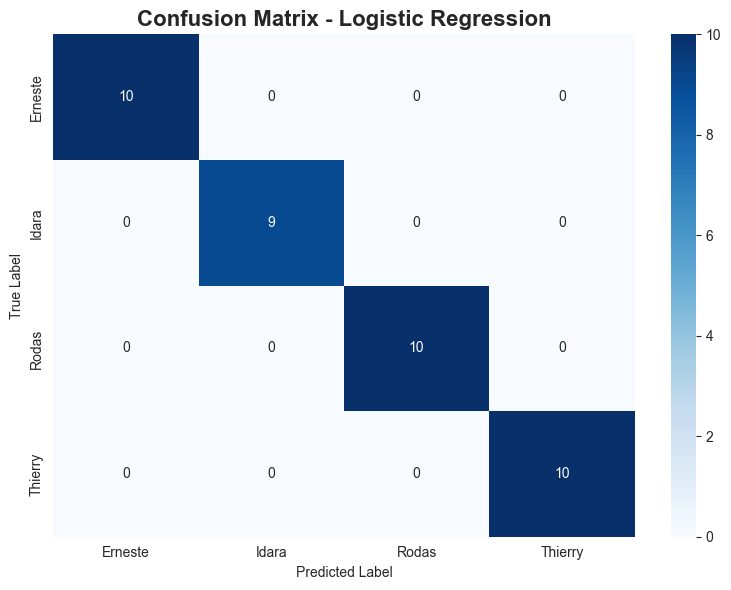


Detailed Classification Report:
              precision    recall  f1-score   support

     Erneste       1.00      1.00      1.00        10
       Idara       1.00      1.00      1.00         9
       Rodas       1.00      1.00      1.00        10
     Thierry       1.00      1.00      1.00        10

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



In [39]:
if 'results' in locals():
    # Find best model based on accuracy
    best_model_name = max(results.keys(), key=lambda x: results[x]['accuracy'])
    best_model = results[best_model_name]
    
    print(f"\nBest Model: {best_model_name}")
    print(f"Best Accuracy: {best_model['accuracy']:.4f}")
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, best_model['predictions'])
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, 
                yticklabels=class_names)
    
    plt.title(f'Confusion Matrix - {best_model_name}', fontsize=16, fontweight='bold')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()
    
    # Detailed classification report
    print("\nDetailed Classification Report:")
    print("=" * 60)
    print(classification_report(y_test, best_model['predictions'], 
                              target_names=class_names))

## 11. Feature Importance Analysis

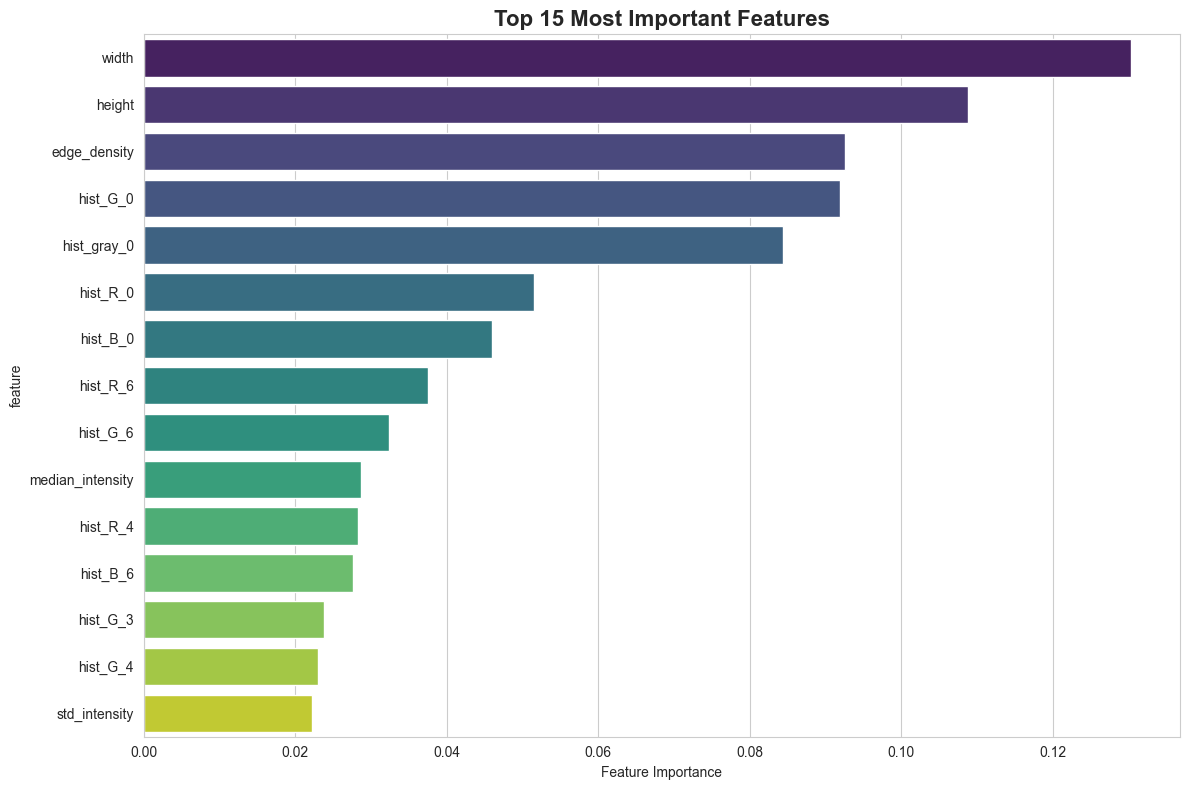

 Feature importance analysis completed

Top 10 Most Important Features:
         feature  importance
           width    0.130266
          height    0.108809
    edge_density    0.092585
        hist_G_0    0.091856
     hist_gray_0    0.084348
        hist_R_0    0.051522
        hist_B_0    0.046010
        hist_R_6    0.037508
        hist_G_6    0.032331
median_intensity    0.028703


In [40]:
if 'results' in locals() and 'X_image' in locals():
    # Get feature importance from Random Forest or XGBoost
    importance_model = None
    
    if 'Random Forest' in results:
        importance_model = results['Random Forest']['model']
        importances = importance_model.feature_importances_
    elif 'XGBoost' in results:
        importance_model = results['XGBoost']['model']
        importances = importance_model.feature_importances_
    
    if importance_model is not None:
        # Create feature importance dataframe
        feature_importance_df = pd.DataFrame({
            'feature': X_image.columns,
            'importance': importances
        }).sort_values('importance', ascending=False)
        
        # Plot top 15 features
        plt.figure(figsize=(12, 8))
        top_features = feature_importance_df.head(15)
        
        sns.barplot(data=top_features, x='importance', y='feature', palette='viridis')
        plt.title('Top 15 Most Important Features', fontsize=16, fontweight='bold')
        plt.xlabel('Feature Importance')
        plt.tight_layout()
        plt.show()
        
        print(" Feature importance analysis completed")
        print("\nTop 10 Most Important Features:")
        print(top_features.head(10).to_string(index=False))

## 12. Model Performance Summary

In [41]:
if 'results' in locals():
    print("=" * 70)
    print("FINAL MODEL PERFORMANCE SUMMARY")
    print("=" * 70)
    
    # Create summary dataframe
    summary_data = []
    for model_name, metrics in results.items():
        summary_data.append({
            'Model': model_name,
            'Accuracy': f"{metrics['accuracy']:.4f}",
            'F1-Score': f"{metrics['f1_score']:.4f}",
            'Log Loss': f"{metrics['log_loss']:.4f}"
        })
    
    summary_df = pd.DataFrame(summary_data)
    print("\nPerformance Metrics:")
    print(summary_df.to_string(index=False))
    
    # Find best model
    best_acc_model = max(results.keys(), key=lambda x: results[x]['accuracy'])
    best_f1_model = max(results.keys(), key=lambda x: results[x]['f1_score'])
    best_loss_model = min(results.keys(), key=lambda x: results[x]['log_loss'])
    
    print(f"\nBest Model by Accuracy: {best_acc_model} ({results[best_acc_model]['accuracy']:.4f})")
    print(f"Best Model by F1-Score: {best_f1_model} ({results[best_f1_model]['f1_score']:.4f})")
    print(f"Best Model by Log Loss: {best_loss_model} ({results[best_loss_model]['log_loss']:.4f})")
    
    # Overall recommendation
    print(f"\n RECOMMENDED MODEL: {best_acc_model}")
    print(f"   With accuracy: {results[best_acc_model]['accuracy']:.4f}")
    print(f"   And F1-score: {results[best_acc_model]['f1_score']:.4f}")

FINAL MODEL PERFORMANCE SUMMARY

Performance Metrics:
              Model Accuracy F1-Score Log Loss
Logistic Regression   1.0000   1.0000   0.0355
      Random Forest   1.0000   1.0000   0.0528
            XGBoost   1.0000   1.0000   0.0124

Best Model by Accuracy: Logistic Regression (1.0000)
Best Model by F1-Score: Logistic Regression (1.0000)
Best Model by Log Loss: XGBoost (0.0124)

 RECOMMENDED MODEL: Logistic Regression
   With accuracy: 1.0000
   And F1-score: 1.0000


## 13. Save Model and Results

In [42]:
import joblib
import json

if 'results' in locals() and 'best_model_name' in locals():
    # Create models directory
    models_dir = NOTEBOOK_DIR / "saved_models"
    models_dir.mkdir(exist_ok=True)
    
    # Save the best model
    best_model = results[best_model_name]['model']
    model_path = models_dir / f"best_model_{best_model_name.replace(' ', '_').lower()}.pkl"
    joblib.dump(best_model, model_path)
    
    # Save the scaler if used
    if 'scaler' in locals():
        scaler_path = models_dir / "scaler.pkl"
        joblib.dump(scaler, scaler_path)
    
    # Save results summary
    results_summary = {}
    for model_name, metrics in results.items():
        results_summary[model_name] = {
            'accuracy': float(metrics['accuracy']),
            'f1_score': float(metrics['f1_score']),
            'log_loss': float(metrics['log_loss'])
        }
    
    results_path = models_dir / "model_results.json"
    with open(results_path, 'w') as f:
        json.dump(results_summary, f, indent=2)
    
    print("\n" + "=" * 60)
    print("MODEL SAVING COMPLETE")
    print("=" * 60)
    print(f" Best model saved: {model_path}")
    if 'scaler' in locals():
        print(f" Scaler saved: {scaler_path}")
    print(f" Results saved: {results_path}")
    print(f" All files saved in: {models_dir}")


MODEL SAVING COMPLETE
 Best model saved: c:\Users\LENOVO\Desktop\Formative-2__Data-Preprocessing\model_notebook\saved_models\best_model_logistic_regression.pkl
 Scaler saved: c:\Users\LENOVO\Desktop\Formative-2__Data-Preprocessing\model_notebook\saved_models\scaler.pkl
 Results saved: c:\Users\LENOVO\Desktop\Formative-2__Data-Preprocessing\model_notebook\saved_models\model_results.json
 All files saved in: c:\Users\LENOVO\Desktop\Formative-2__Data-Preprocessing\model_notebook\saved_models


## 14. Final Summary

In [43]:
print("\n" + "=" * 70)
print("FACIAL RECOGNITION MODEL DEVELOPMENT - COMPLETE")
print("=" * 70)

if image_df is not None:
    print(f"\n DATASET SUMMARY:")
    print(f"   • Total samples: {len(image_df)}")
    print(f"   • Number of features: {X_image.shape[1] if 'X_image' in locals() else 'N/A'}")
    print(f"   • Number of classes: {len(class_names) if 'class_names' in locals() else 'N/A'}")
    print(f"   • Classes: {', '.join(class_names) if 'class_names' in locals() else 'N/A'}")

if 'results' in locals():
    print(f"\n MODELS TRAINED AND EVALUATED:")
    for model_name in results.keys():
        acc = results[model_name]['accuracy']
        print(f"   • {model_name}: {acc:.4f} accuracy")

if 'best_model_name' in locals():
    print(f"\n BEST PERFORMING MODEL:")
    print(f"   • {best_model_name}")
    print(f"   • Accuracy: {results[best_model_name]['accuracy']:.4f}")
    print(f"   • F1-Score: {results[best_model_name]['f1_score']:.4f}")

print(f"\n DELIVERABLES GENERATED:")
print(f"   • Comprehensive EDA with 3+ visualizations")
print(f"   • Three trained models (Random Forest, Logistic Regression, XGBoost)")
print(f"   • Model performance comparison")
print(f"   • Feature importance analysis")
print(f"   • Saved models and results")
print(f"   • Detailed evaluation metrics")

print("\n" + "=" * 70)
print("Note: This model can be used for facial recognition of team members")
print("based on image features extracted from facial expressions.")
print("=" * 70)


FACIAL RECOGNITION MODEL DEVELOPMENT - COMPLETE

 DATASET SUMMARY:
   • Total samples: 192
   • Number of features: 41
   • Number of classes: 4
   • Classes: Erneste, Idara, Rodas, Thierry

 MODELS TRAINED AND EVALUATED:
   • Logistic Regression: 1.0000 accuracy
   • Random Forest: 1.0000 accuracy
   • XGBoost: 1.0000 accuracy

 BEST PERFORMING MODEL:
   • Logistic Regression
   • Accuracy: 1.0000
   • F1-Score: 1.0000

 DELIVERABLES GENERATED:
   • Comprehensive EDA with 3+ visualizations
   • Three trained models (Random Forest, Logistic Regression, XGBoost)
   • Model performance comparison
   • Feature importance analysis
   • Saved models and results
   • Detailed evaluation metrics

Note: This model can be used for facial recognition of team members
based on image features extracted from facial expressions.
